In [1]:
%matplotlib inline

import torch
import sklearn
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.datasets as datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import visdom
import gan_model
from torch.autograd import Variable
vis = visdom.Visdom()

In [2]:
tsne = TSNE(n_components=2, random_state=0)

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

X=digits.data[:1000]
y= digits.target[:1000]

In [4]:
X_2d = tsne.fit_transform(X)

In [4]:
target_ids = range(len(digits.target_names))

plt.figure(figsize=(12,10))
colors = 'r','g','b','c','m','y','k','w','orange','purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y ==i, 0], X_2d[y == i, 1], c=c, label = label)
plt.legend()
plt.show()



NameError: name 'X_2d' is not defined

In [9]:
num_of_fig=2500

In [10]:
CNN=torch.load('./MNIST_CNN.pth')

In [11]:
G=gan_model.Generator()
G=G.cuda()


In [12]:
G.load_state_dict(torch.load('./Generator/Generator_two_state_dict.pth'))

In [13]:
test_in=torch.rand(num_of_fig,100,1,1)
test_in=test_in.cuda()
test_in = Variable(test_in)

In [14]:
fake = G(test_in)

In [15]:
vis.images(fake.data.cpu())

'window_35fc29f57e2808'

In [16]:
label_0 = np.zeros(num_of_fig)
label_1 = np.ones(num_of_fig)
label_2 = np.ones(num_of_fig)+1
label_3 = np.ones(num_of_fig)+2
label_4 = np.ones(num_of_fig)+3
label_5 = np.ones(num_of_fig)+4
label_6 = np.ones(num_of_fig)+5
label_7 = np.ones(num_of_fig)+6
label_8 = np.ones(num_of_fig)+7
label_9 = np.ones(num_of_fig)+8
label_10 = np.ones(num_of_fig)+9

In [17]:
labels=np.concatenate((label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,
                       label_8,label_9,label_10),axis=0)

In [41]:
zero_real = torch.load('./split_img/zero_img.pkl')
one_real = torch.load('./split_img/one_img.pkl')
two_real=torch.load('./split_img/two_img.pkl')
three_real = torch.load('./split_img/three_img.pkl')
four_real = torch.load('./split_img/four_img.pkl')
five_real = torch.load('./split_img/five_img.pkl')
six_real = torch.load('./split_img/six_img.pkl')
seven_real = torch.load('./split_img/seven_img.pkl')
eight_real = torch.load('./split_img/eight_img.pkl')
nine_real = torch.load('./split_img/nine_img.pkl')

In [42]:
zero = zero_real[:num_of_fig]
one = one_real[:num_of_fig]
two = two_real[:num_of_fig]
three = three_real[:num_of_fig]
four = four_real[:num_of_fig]
five = five_real[:num_of_fig]
six = six_real[:num_of_fig]
seven = seven_real[:num_of_fig]
eight = eight_real[:num_of_fig]
nine = nine_real[:num_of_fig]


In [20]:
cnn_input_img=torch.cat((zero,one,two,three,four,five,six,seven,eight,nine,(fake.data.cpu())))
print(cnn_input_img.shape)

_,CNN_out = CNN(Variable(cnn_input_img.cuda()))
print(CNN_out.shape)

torch.Size([27500, 1, 28, 28])
torch.Size([27500, 160])


In [21]:


zero = zero.view(num_of_fig,784)
one = one.view(num_of_fig,784)
two = two.view(num_of_fig,784)
three = three.view(num_of_fig,784)
four = four.view(num_of_fig,784)
five = five.view(num_of_fig,784)
six = six.view(num_of_fig,784)
seven = seven.view(num_of_fig,784)
eight = eight.view(num_of_fig,784)
nine = nine.view(num_of_fig,784)



In [22]:
fake = fake.view(num_of_fig,784)

In [23]:
zero = zero.numpy()
one = one.numpy()
two = two.numpy()
three = three.numpy()
four = four.numpy()
five = five.numpy()
six = six.numpy()
seven = seven.numpy()
eight = eight.numpy()
nine = nine.numpy()



In [24]:
fake = (fake.data.cpu()).numpy()

In [25]:
input_img=np.concatenate((zero,one,two,three,four,five,six,seven,eight,nine,fake))



In [26]:
input_img.shape

(27500, 784)

In [27]:
labels.shape

(27500,)

In [195]:
Img_2d = tsne.fit_transform(input_img)

In [26]:
target_name = [0,1,2,3,4,5,6,7,8,9,10]
print(target_name)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


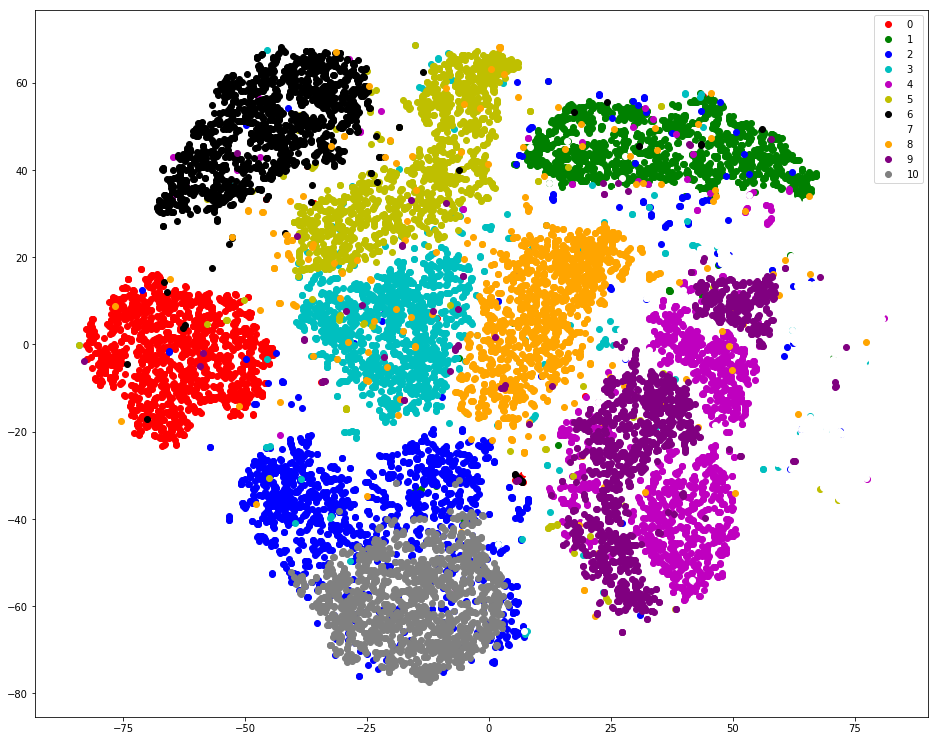

In [198]:
target_ids = range(11)

plt.figure(figsize=(16,13))
colors = 'r','g','b','c','m','y','k','w','orange','purple','grey'
for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(Img_2d[labels ==i, 0], Img_2d[labels == i, 1], color=c, label = label)
plt.legend()
plt.show()



In [28]:
print(CNN_out.shape)
CNN_out= (CNN_out.data.cpu()).numpy()
print(CNN_out.shape)


torch.Size([27500, 160])
(27500, 160)


In [29]:
Img_2d_cnn = tsne.fit_transform(CNN_out)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


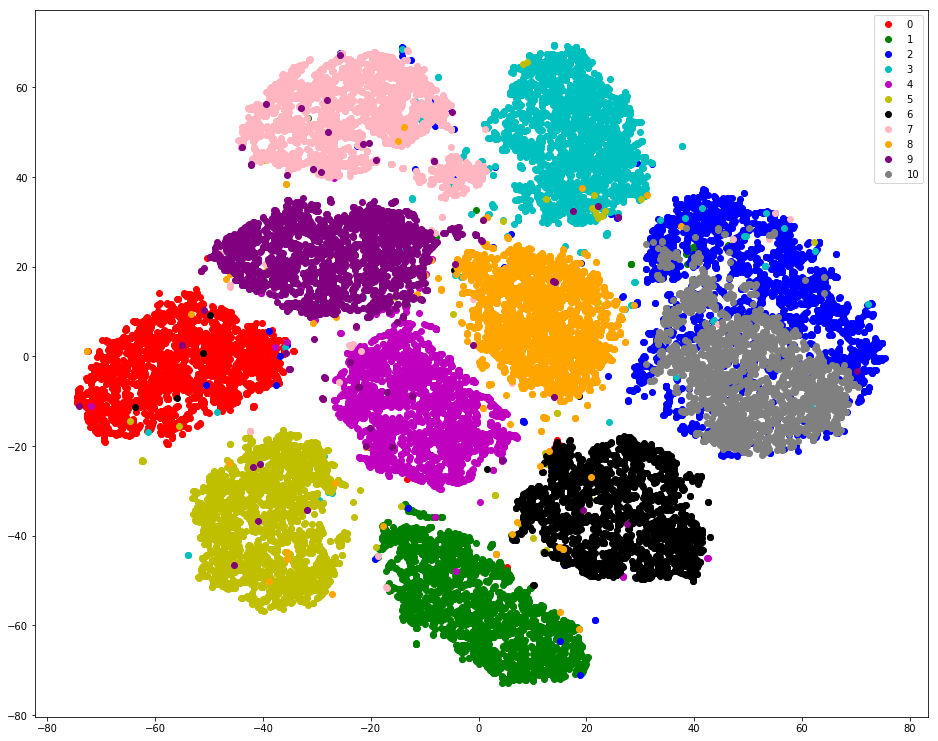

In [31]:
#for two

target_name = [0,1,2,3,4,5,6,7,8,9,10]
print(target_name)

target_ids = range(11)

plt.figure(figsize=(16,13))
colors = 'r','g','b','c','m','y','k','lightpink','orange','purple','grey'
for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(Img_2d_cnn[labels ==i, 0], Img_2d_cnn[labels == i, 1], color=c, label = label)
plt.legend()
plt.show()




In [44]:
G.load_state_dict(torch.load('./Generator/Generator_zero_state_dict.pth'))

zero_real = torch.load('./split_img/zero_img.pkl')
one_real = torch.load('./split_img/one_img.pkl')
two_real=torch.load('./split_img/two_img.pkl')
three_real = torch.load('./split_img/three_img.pkl')
four_real = torch.load('./split_img/four_img.pkl')
five_real = torch.load('./split_img/five_img.pkl')
six_real = torch.load('./split_img/six_img.pkl')
seven_real = torch.load('./split_img/seven_img.pkl')
eight_real = torch.load('./split_img/eight_img.pkl')
nine_real = torch.load('./split_img/nine_img.pkl')

zero = zero_real[:num_of_fig]
one = one_real[:num_of_fig]
two = two_real[:num_of_fig]
three = three_real[:num_of_fig]
four = four_real[:num_of_fig]
five = five_real[:num_of_fig]
six = six_real[:num_of_fig]
seven = seven_real[:num_of_fig]
eight = eight_real[:num_of_fig]
nine = nine_real[:num_of_fig]


In [45]:
test_in=torch.rand(num_of_fig,100,1,1)
test_in=test_in.cuda()
test_in = Variable(test_in)

fake = G(test_in)

vis.images(fake.data.cpu())

fake = fake.data.cpu()

cnn_input_img=torch.cat((zero,one,two,three,four,five,six,seven,eight,nine,fake))
print(cnn_input_img.shape)

_,CNN_out = CNN(Variable(cnn_input_img.cuda()))
print(CNN_out.shape)

torch.Size([27500, 1, 28, 28])
torch.Size([27500, 160])


In [46]:
print(CNN_out.shape)
CNN_out= (CNN_out.data.cpu()).numpy()
print(CNN_out.shape)


torch.Size([27500, 160])
(27500, 160)


In [47]:
Img_2d_cnn = tsne.fit_transform(CNN_out)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


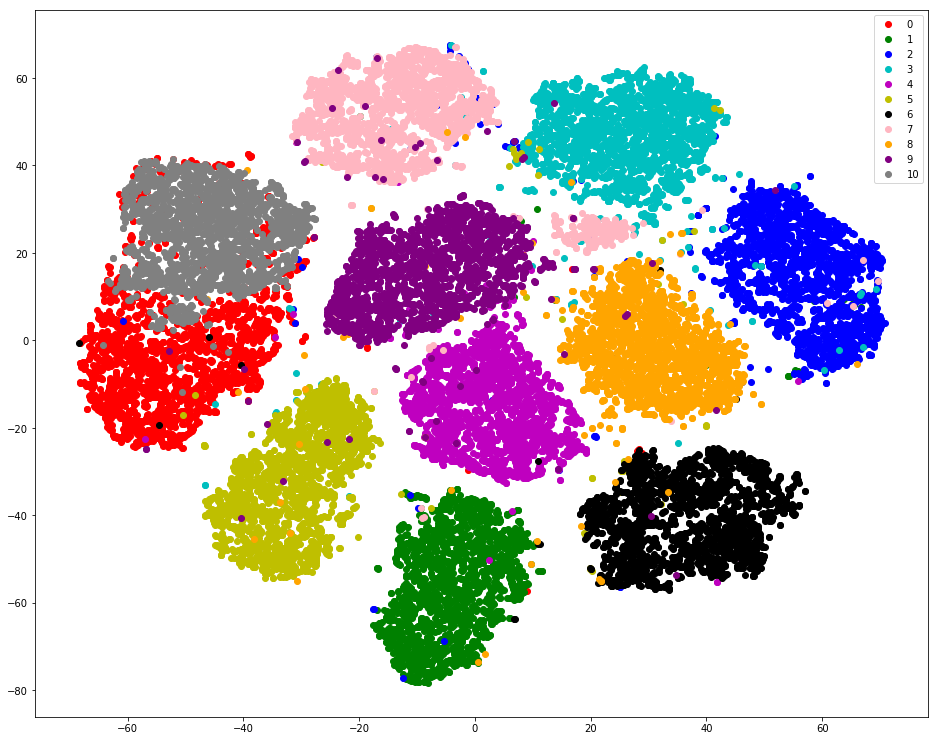

In [48]:
#for zero

target_name = [0,1,2,3,4,5,6,7,8,9,10]
print(target_name)

target_ids = range(11)

plt.figure(figsize=(16,13))
colors = 'r','g','b','c','m','y','k','lightpink','orange','purple','grey'
for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(Img_2d_cnn[labels ==i, 0], Img_2d_cnn[labels == i, 1], color=c, label = label)
plt.legend()
plt.show()




In [57]:
G.load_state_dict(torch.load('./Generator/Generator_one_state_dict.pth'))

zero_real = torch.load('./split_img/zero_img.pkl')
one_real = torch.load('./split_img/one_img.pkl')
two_real=torch.load('./split_img/two_img.pkl')
three_real = torch.load('./split_img/three_img.pkl')
four_real = torch.load('./split_img/four_img.pkl')
five_real = torch.load('./split_img/five_img.pkl')
six_real = torch.load('./split_img/six_img.pkl')
seven_real = torch.load('./split_img/seven_img.pkl')
eight_real = torch.load('./split_img/eight_img.pkl')
nine_real = torch.load('./split_img/nine_img.pkl')

zero = zero_real[:num_of_fig]
one = one_real[:num_of_fig]
two = two_real[:num_of_fig]
three = three_real[:num_of_fig]
four = four_real[:num_of_fig]
five = five_real[:num_of_fig]
six = six_real[:num_of_fig]
seven = seven_real[:num_of_fig]
eight = eight_real[:num_of_fig]
nine = nine_real[:num_of_fig]

test_in=torch.randn(num_of_fig,100,1,1)
test_in=test_in.cuda()
test_in = Variable(test_in)

fake = G(test_in)

vis.images(fake.data.cpu())

fake = fake.data.cpu()

cnn_input_img=torch.cat((zero,one,two,three,four,five,six,seven,eight,nine,fake))
print(cnn_input_img.shape)

_,CNN_out = CNN(Variable(cnn_input_img.cuda()))
print(CNN_out.shape)

print(CNN_out.shape)
CNN_out= (CNN_out.data.cpu()).numpy()
print(CNN_out.shape)


torch.Size([27500, 1, 28, 28])
torch.Size([27500, 160])
torch.Size([27500, 160])
(27500, 160)


In [58]:
Img_2d_cnn = tsne.fit_transform(CNN_out)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


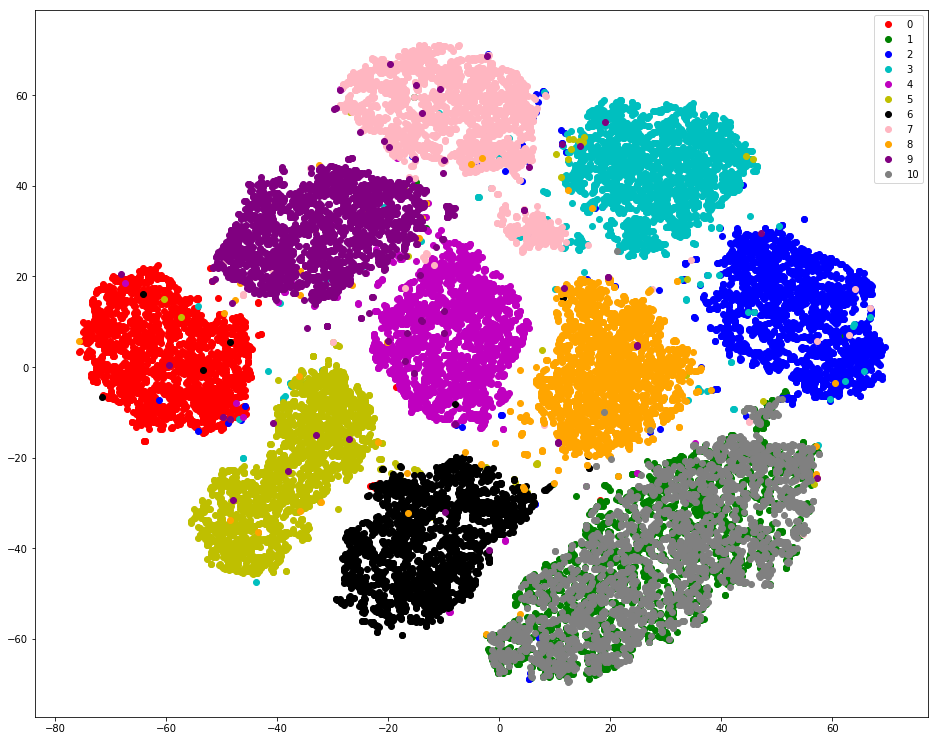

In [59]:
#for one

target_name = [0,1,2,3,4,5,6,7,8,9,10]
print(target_name)

target_ids = range(11)

plt.figure(figsize=(16,13))
colors = 'r','g','b','c','m','y','k','lightpink','orange','purple','grey'
for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(Img_2d_cnn[labels ==i, 0], Img_2d_cnn[labels == i, 1], color=c, label = label)
plt.legend()
plt.show()




In [61]:
G.load_state_dict(torch.load('./Generator/Generator_three_state_dict.pth'))

zero_real = torch.load('./split_img/zero_img.pkl')
one_real = torch.load('./split_img/one_img.pkl')
two_real=torch.load('./split_img/two_img.pkl')
three_real = torch.load('./split_img/three_img.pkl')
four_real = torch.load('./split_img/four_img.pkl')
five_real = torch.load('./split_img/five_img.pkl')
six_real = torch.load('./split_img/six_img.pkl')
seven_real = torch.load('./split_img/seven_img.pkl')
eight_real = torch.load('./split_img/eight_img.pkl')
nine_real = torch.load('./split_img/nine_img.pkl')

zero = zero_real[:num_of_fig]
one = one_real[:num_of_fig]
two = two_real[:num_of_fig]
three = three_real[:num_of_fig]
four = four_real[:num_of_fig]
five = five_real[:num_of_fig]
six = six_real[:num_of_fig]
seven = seven_real[:num_of_fig]
eight = eight_real[:num_of_fig]
nine = nine_real[:num_of_fig]

test_in=torch.randn(num_of_fig,100,1,1)
test_in=test_in.cuda()
test_in = Variable(test_in)

fake = G(test_in)

vis.images(fake.data.cpu())

fake = fake.data.cpu()

cnn_input_img=torch.cat((zero,one,two,three,four,five,six,seven,eight,nine,fake))
print(cnn_input_img.shape)

_,CNN_out = CNN(Variable(cnn_input_img.cuda()))
print(CNN_out.shape)

print(CNN_out.shape)
CNN_out= (CNN_out.data.cpu()).numpy()
print(CNN_out.shape)


torch.Size([27500, 1, 28, 28])
torch.Size([27500, 160])
torch.Size([27500, 160])
(27500, 160)


In [62]:
Img_2d_cnn = tsne.fit_transform(CNN_out)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


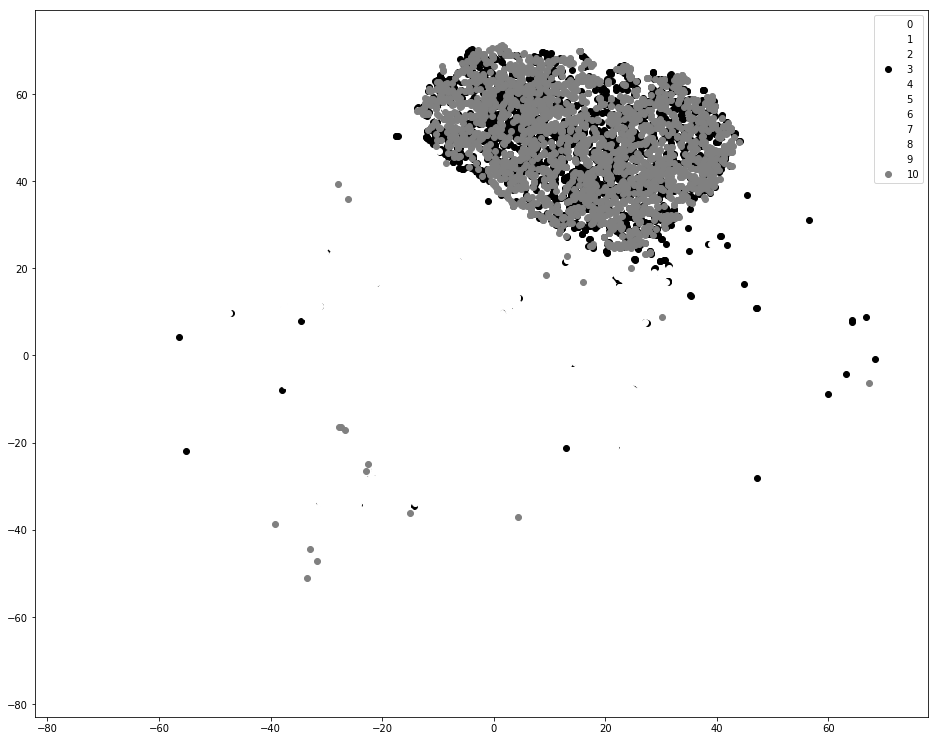

In [ ]:
#for three

target_name = [0,1,2,3,4,5,6,7,8,9,10]
print(target_name)

target_ids = range(11)

plt.figure(figsize=(16,13))
colors = 'r','g','b','c','m','y','k','lightpink','orange','purple','grey'
#colors = 'w','w','w','black','w','w','w','w','w','w','grey'
for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(Img_2d_cnn[labels ==i, 0], Img_2d_cnn[labels == i, 1], color=c, label = label)
plt.legend()
plt.show()


